In [1]:
from pandas import read_csv

In [17]:
from Models.simple_VAE import VAE,loss_function
from sklearn.preprocessing import MinMaxScaler
import argparse
import torch
import torch.utils.data 
from torch.utils.data import DataLoader
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
import pandas as pd




# darray = np.loadtxt('data/wine2.csv',delimiter=',')
# scaler = MinMaxScaler()
# scaler.fit(darray)
# dout = scaler.transform(darray)


In [3]:
data = read_csv('data/esg_data_scaled')

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data

,Entity,Name,Year,MSCI Rating,MSCI Environment Score,MSCI Social,MSCI Goverance,Entenched board,Related Party Transactions,Secuities Fraud,...,Total Other Compensation Paid.1,# of CEO and Equiv Changes in FY,# CEO and Equiv Included in Comp,CEO Tenure at Fiscal Year End,Total Comp Paid to CFO and Equiv,Total Compensation Paid.1,Fees Paid in Cash,Stock Awards Granted.1,# of Board Changes in Fiscal Year,# Directors Included in Comp
0,0.113402,0.000000,0.000000,0.333333,0.689130,0.726,0.819792,0.0,0.0,0.0,...,0.006066,0.00,0.2,0.001825,0.030763,0.073736,0.073736,0.000000,0.117647,0.291667
1,0.113402,0.000000,0.090909,0.166667,0.650000,0.773,0.590625,0.0,0.0,0.0,...,0.006471,0.25,0.4,0.000085,0.018150,0.073223,0.073223,0.000000,0.117647,0.291667
2,0.113402,0.000000,0.181818,0.833333,0.444565,0.494,0.484375,0.0,0.0,0.0,...,0.011123,0.00,0.2,0.000582,0.006852,0.073531,0.073531,0.000000,0.058824,0.333333
3,0.113402,0.000000,0.272727,0.000000,0.397826,0.701,0.502083,0.0,0.0,0.0,...,0.007031,0.00,0.2,0.001079,0.018808,0.073223,0.073223,0.001693,0.235294,0.333333
4,0.113402,0.000000,0.363636,0.166667,0.402174,0.640,1.000000,0.0,0.0,0.0,...,0.005750,0.00,0.2,0.001576,0.017164,0.065122,0.065122,0.000000,0.117647,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.969072,0.969072,0.636364,0.333333,1.000000,0.850,0.708333,0.0,0.0,0.0,...,0.008979,0.00,0.2,0.014879,0.270272,0.157317,0.157317,0.007931,0.235294,0.541667
1172,0.969072,0.969072,0.727273,0.333333,1.000000,0.870,0.552083,0.0,0.0,0.0,...,0.009571,0.00,0.2,0.015377,0.218762,0.147267,0.147267,0.007931,0.117647,0.500000
1173,0.969072,0.969072,0.818182,0.333333,1.000000,0.810,0.625000,0.0,0.0,0.0,...,0.009098,0.00,0.2,0.015874,0.090940,0.142139,0.142139,0.011888,0.117647,0.458333
1174,0.969072,0.969072,0.909091,0.333333,1.000000,0.780,0.750000,0.0,0.0,0.0,...,0.007102,0.25,0.4,0.000333,0.049883,0.135477,0.135477,0.006238,0.058824,0.375000


In [6]:
data.to_numpy()[:3,:3]

array([[0.11340206, 0.        , 0.        ],
       [0.11340206, 0.        , 0.09090909],
       [0.11340206, 0.        , 0.18181818]])

In [7]:
darray = data.to_numpy()

In [8]:
for year in data['Year'].unique():
    print(darray[darray[:,2]==year,:].shape)

(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)


In [9]:
len(data['Year'].unique())

12

In [11]:
dtensor[:,2]

tensor([0.0000, 0.0909, 0.1818,  ..., 0.8182, 0.9091, 1.0000])

In [12]:
def RMSE(darray,recon):
    return np.sqrt(np.mean(np.square(darray - recon)))

In [44]:
data_iter = DataLoader(darray,batch_size=125, shuffle=True)

In [45]:

dtensor = torch.FloatTensor(darray)

VAE(
  (fc1): Linear(in_features=232, out_features=400, bias=True)
  (fc11): Linear(in_features=400, out_features=300, bias=True)
  (fc12): Linear(in_features=300, out_features=200, bias=True)
  (fc21): Linear(in_features=200, out_features=10, bias=True)
  (fc22): Linear(in_features=200, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=200, bias=True)
  (fc31): Linear(in_features=200, out_features=300, bias=True)
  (fc32): Linear(in_features=300, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=232, bias=True)
)

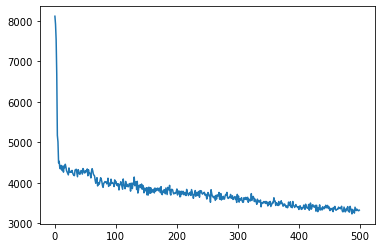

0.13403182

In [50]:
   #Sending scaled data to device
device = torch.device("cpu")

    


model = VAE(num_feats = 232,latent_dims=10).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
model.train()


loss_store = []
for epoch in range(500): 
    for (idx, batch) in enumerate(data_iter):
        
        
        batch_in = batch.float()
        
        
        drecon,mu,log_var =  model(batch_in)
        optimizer.zero_grad()
        loss = loss_function(drecon, batch_in, mu, log_var)
        loss.backward()
        optimizer.step()


    loss_store.append(loss.item())

        # if epoch %100 == 0:
       
       
        #     print(loss.item())




    
plt.plot(loss_store)
plt.show()
drecon,mu,log_var =  model(dtensor)
recon_array = drecon.detach().numpy()
input_array = dtensor.detach().numpy()

RMSE(input_array,recon_array)


In [31]:
recon_array

array([[4.0835747e-01, 1.7075610e-01, 2.9713834e-02, ..., 2.2386607e-04,
        1.1625313e-01, 2.6838937e-01],
       [2.9835504e-01, 1.6878642e-01, 5.9019536e-02, ..., 5.6655001e-04,
        1.4594603e-01, 2.3914938e-01],
       [1.7649491e-01, 1.5613410e-01, 2.0884095e-01, ..., 1.5912919e-03,
        1.8503086e-01, 2.5680616e-01],
       ...,
       [9.5031661e-01, 9.4135761e-01, 7.9751927e-01, ..., 3.5168983e-03,
        9.4353721e-02, 3.8618311e-01],
       [9.3279731e-01, 9.8170668e-01, 9.2983657e-01, ..., 2.4109811e-03,
        1.3996354e-01, 4.1001886e-01],
       [9.1886371e-01, 9.8944002e-01, 9.3950951e-01, ..., 2.7326311e-03,
        1.9934653e-01, 4.8608574e-01]], dtype=float32)

In [32]:
input_array

array([[0.11340206, 0.        , 0.        , ..., 0.        , 0.11764706,
        0.29166666],
       [0.11340206, 0.        , 0.09090909, ..., 0.        , 0.11764706,
        0.29166666],
       [0.11340206, 0.        , 0.18181819, ..., 0.        , 0.05882353,
        0.33333334],
       ...,
       [0.96907216, 0.96907216, 0.8181818 , ..., 0.01188783, 0.11764706,
        0.45833334],
       [0.96907216, 0.96907216, 0.90909094, ..., 0.00623808, 0.05882353,
        0.375     ],
       [0.96907216, 0.96907216, 1.        , ..., 0.00623808, 0.23529412,
        0.45833334]], dtype=float32)

In [33]:
input_array-recon_array

array([[-2.9495540e-01, -1.7075610e-01, -2.9713834e-02, ...,
        -2.2386607e-04,  1.3939291e-03,  2.3277283e-02],
       [-1.8495297e-01, -1.6878642e-01,  3.1889558e-02, ...,
        -5.6655001e-04, -2.8298967e-02,  5.2517280e-02],
       [-6.3092850e-02, -1.5613410e-01, -2.7022764e-02, ...,
        -1.5912919e-03, -1.2620734e-01,  7.6527178e-02],
       ...,
       [ 1.8755555e-02,  2.7714550e-02,  2.0662546e-02, ...,
         8.3709303e-03,  2.3293339e-02,  7.2150230e-02],
       [ 3.6274850e-02, -1.2634516e-02, -2.0745635e-02, ...,
         3.8271022e-03, -8.1140012e-02, -3.5018861e-02],
       [ 5.0208449e-02, -2.0367861e-02,  6.0490489e-02, ...,
         3.5054523e-03,  3.5947591e-02, -2.7752399e-02]], dtype=float32)